# Adding new datasets 

We compare the differnce in precision at k=800 using a similar model to what was run in 2015 and then again adding BR and manifest data. 


In [1]:
# Import necesary packages and set output directory
import epa.model.workflow
from drain import step
from drain import explore, model

step.OUTPUTDIR = '/mnt/data/nysdec/epa-ny/drain/'

### Original Data (everything excluding manifest and BR data)

In [2]:
original_model = epa.model.workflow.violation_state_original_data()
step.load(original_model)

[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
        handlers={}, icis={}, impute=True, include=set([]),
        inve...', region=None,
        rmp={}, train_query='aux.evaluation_state', train_years=2,
        year=2013)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
        handlers={}, icis={}, impute=True, include=set([]),
        inve...', region=None,
        rmp={}, train_query='aux.evaluation_state', train_years=2,
        year=2015)],
       prefit=False, return_estimator=False,


In [5]:
df_original_model = explore.to_dataframe(original_model)
df_original_model

,train_years,year,step
0,2,2013,FitPredict(inputs=[Construct(__class_name__='s...
1,2,2015,FitPredict(inputs=[Construct(__class_name__='s...
2,3,2013,FitPredict(inputs=[Construct(__class_name__='s...
3,3,2015,FitPredict(inputs=[Construct(__class_name__='s...


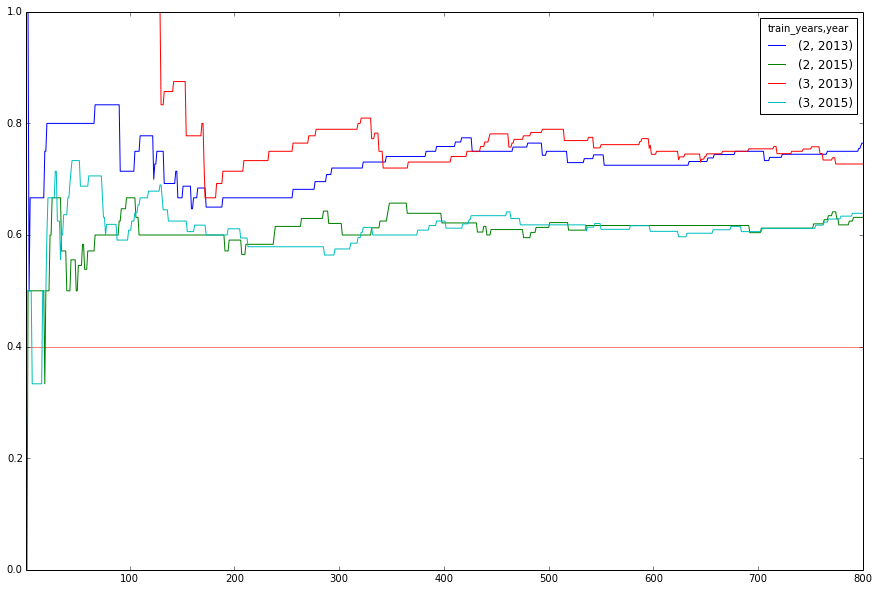

In [8]:
%matplotlib inline
plot = explore.apply(df_original_model, model.precision_series, k=800, dropna=False).plot(figsize=(15,10))
plot.axhline(y=0.4,xmin=0,xmax=800,c="red",linewidth=0.5,zorder=0)

In [5]:
original_precision = explore.apply(df_original_model, model.precision, k=800, dropna=False)
original_precision

train_years  year
2            2013    0.735849
             2015    0.651515
3            2013    0.750000
             2015    0.605263
Name: step, dtype: float64

### Adding manifest data only

In [6]:
manifest_added_model = epa.model.workflow.violation_state_manifest_added()
step.load(manifest_added_model)

[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['br_.*']), handlers={},
        icis={}, impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_state', region=None, rmp={},
        train_query='aux.evaluation_state', train_years=2, year=2013)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['br_.*']), handlers={},
        icis={}, impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,


In [7]:
df_manifest_added_model = explore.to_dataframe(manifest_added_model)

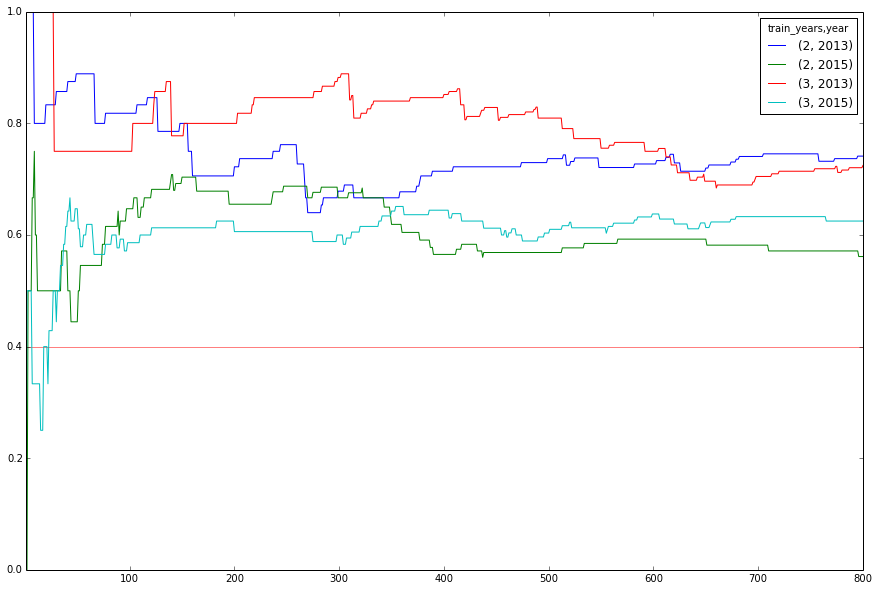

In [8]:
plot = explore.apply(df_manifest_added_model, model.precision_series, k=800, dropna=False).plot(figsize=(15,10))
plot.axhline(y=0.4,xmin=0,xmax=800,c="red",linewidth=0.5,zorder=0)

In [9]:
manifest_precision = explore.apply(df_manifest_added_model, model.precision, k=800, dropna=False)
manifest_precision

train_years  year
2            2013    0.741379
             2015    0.561404
3            2013    0.724638
             2015    0.625000
Name: step, dtype: float64

### Adding BR data only

In [10]:
br_added_model = epa.model.workflow.violation_state_manifest_added()
step.load(br_added_model)

[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['br_.*']), handlers={},
        icis={}, impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_state', region=None, rmp={},
        train_query='aux.evaluation_state', train_years=2, year=2013)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['br_.*']), handlers={},
        icis={}, impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,


In [11]:
df_br_added_model = explore.to_dataframe(br_added_model)

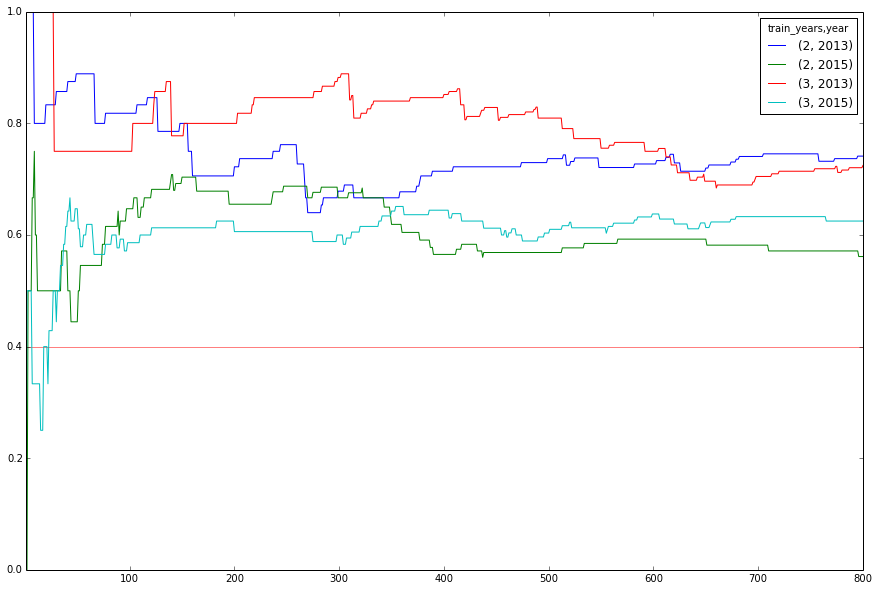

In [12]:
plot = explore.apply(df_br_added_model, model.precision_series, k=800, dropna=False).plot(figsize=(15,10))
plot.axhline(y=0.4,xmin=0,xmax=800,c="red",linewidth=0.5,zorder=0)

In [13]:
br_precision = explore.apply(df_br_added_model, model.precision, k=800, dropna=False)
br_precision

train_years  year
2            2013    0.741379
             2015    0.561404
3            2013    0.724638
             2015    0.625000
Name: step, dtype: float64

### Manifest and BR added

In [14]:
manifest_br_added_model = epa.model.workflow.violation_state_manifest_br_added()
step.load(manifest_br_added_model)

[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_state', region=None, rmp={},
        train_query='aux.evaluation_state', train_years=2, year=2013)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcom

In [15]:
df_manifest_br_added_model = explore.to_dataframe(manifest_br_added_model)

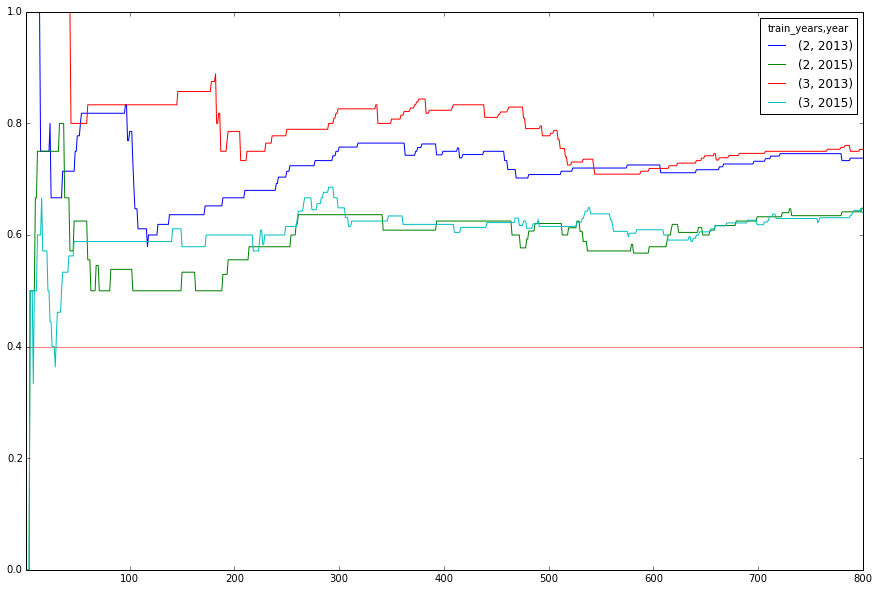

In [16]:
plot = explore.apply(df_manifest_br_added_model, model.precision_series, k=800, dropna=False).plot(figsize=(15,10))
plot.axhline(y=0.4,xmin=0,xmax=800,c="red",linewidth=0.5,zorder=0)

In [17]:
all_precision = explore.apply(df_manifest_br_added_model, model.precision, k=800, dropna=False)
all_precision

train_years  year
2            2013    0.737705
             2015    0.648148
3            2013    0.753425
             2015    0.640449
Name: step, dtype: float64

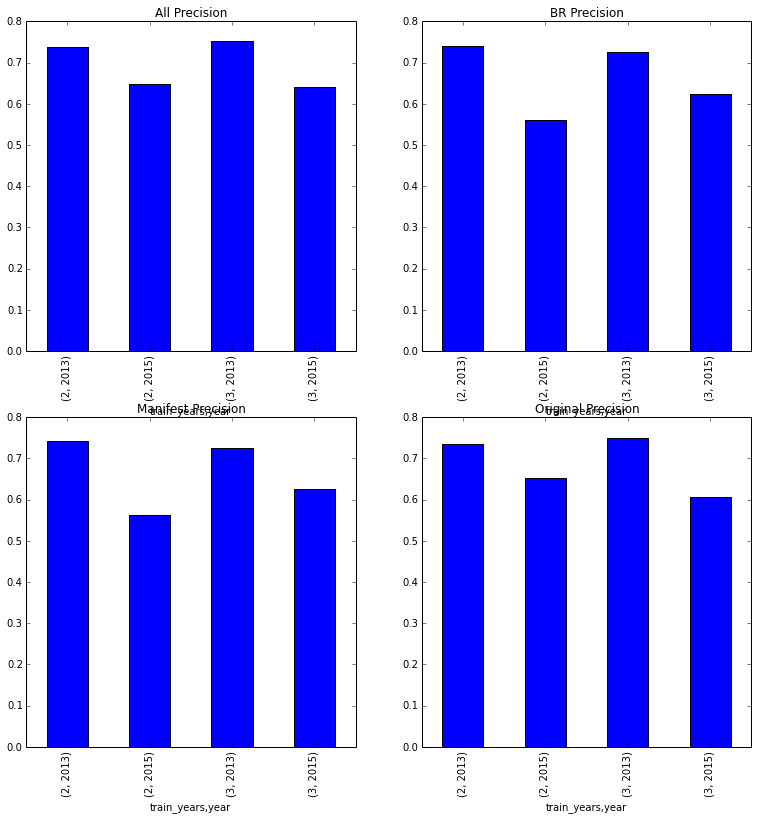

In [18]:
import matplotlib.pyplot as plt




fig, axes = plt.subplots(nrows=2, ncols=2)
all_precision.plot(kind = 'bar',ax=axes[0,0], figsize=(13,13)); axes[0,0].set_title('All Precision')
br_precision.plot(kind = 'bar',ax=axes[0,1], figsize=(13,13)); axes[0,1].set_title('BR Precision')
manifest_precision.plot(kind = 'bar',ax=axes[1,0], figsize=(13,13)); axes[1,0].set_title('Manifest Precision')
original_precision.plot(kind = 'bar',ax=axes[1,1], figsize=(13,13)); axes[1,1].set_title('Original Precision')


AttributeError: 'module' object has no attribute 'style'